# DEEP LEARNING - SENTIMENT ANALYSIS USING NEURAL NETWORK


#### 1) PROBLEM DEFINITION AND DATA COLLECTION





#### This dataset was downloaded from Kaggle and it is build by the flowwing variables and it's respetive data type:
- score: the polarity of the tweet (0 = negative, 4 = positive); int64
- id: The id of the tweet; int64
- date: the date of the tweet (Sat May 16 23:58:44 UTC 2009); object
- flag: The query (lyx). If there is no query, then this value is NO_QUERY.; object
- user: the user that tweeted; object
- text: the text of the tweet (Lyx is cool); object

##### The objetive of this model:
- The objective of developing this model is to classify tweets as positive and negative sentiments.

- The model's output will be the score classification

#### 2) OBJECTIVE DEFINITION



- The output will be the binary classification (negative(0)/positive sentiment(1)) of tweet

- 'Accuracy' will be the metric to evaluate

#### 3) PROTOCOL DEFINITION
To evaluate the performance of this model, I chose to use the Holdout protocol. My decision was based on the following reasons:

*   Limited Computational Resources
*   Simple to implement
*   Dataset Size





#### 4) DATA PREPARATION

In [2]:
##### Import libraries
import pandas as pd
from google.colab import files
import re
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
from keras.preprocessing.text import Tokenizer
#from keras.preprocessing.sequence import pad_sequences
import numpy as np
import gensim
from gensim.models import Word2Vec
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, GlobalAveragePooling1D
from tensorflow.keras.callbacks import EarlyStopping

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [3]:
# load csv file
uploaded = files.upload()

# pick the file
for filename in uploaded.keys():
    print(f'Arquivo "{filename}" carregado com sucesso!')

Saving training.1600000.processed.noemoticon.csv to training.1600000.processed.noemoticon.csv
Arquivo "training.1600000.processed.noemoticon.csv" carregado com sucesso!


In [4]:
#Load the CSV file into a Pandas DataFrame
df = pd.read_csv('training.1600000.processed.noemoticon.csv', encoding='latin1')

#show first 5 rows of the dataset
print(df.head())

   0  1467810369  Mon Apr 06 22:19:45 PDT 2009  NO_QUERY _TheSpecialOne_  \
0  0  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY   scotthamilton   
1  0  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY        mattycus   
2  0  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY         ElleCTF   
3  0  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY          Karoli   
4  0  1467811372  Mon Apr 06 22:20:00 PDT 2009  NO_QUERY        joy_wolf   

  @switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D  
0  is upset that he can't update his Facebook by ...                                                                   
1  @Kenichan I dived many times for the ball. Man...                                                                   
2    my whole body feels itchy and like its on fire                                                                    
3  @nationwideclass no, it's not behaving at all....           

In [5]:
#rename column names
df.columns=['score','id','date','flag','user','text']
df

,score,id,date,flag,user,text
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew
...,...,...,...,...,...,...
1599994,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599995,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599996,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599997,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


In [7]:
#It's only necessary the score and text columns, so I'll create a dataset only with this 2 rows.
df_final=df[['score','text']].copy()
df_final

,score,text
0,0,is upset that he can't update his Facebook by ...
1,0,@Kenichan I dived many times for the ball. Man...
2,0,my whole body feels itchy and like its on fire
3,0,"@nationwideclass no, it's not behaving at all...."
4,0,@Kwesidei not the whole crew
...,...,...
1599994,4,Just woke up. Having no school is the best fee...
1599995,4,TheWDB.com - Very cool to hear old Walt interv...
1599996,4,Are you ready for your MoJo Makeover? Ask me f...
1599997,4,Happy 38th Birthday to my boo of alll time!!! ...


In [8]:
#According to documentation when score has 4, it is a positive tweet. I'll change them for 1 for better understanding
df_final['score']=df_final['score'].replace(4,1)
df_final['score'].value_counts()

1    800000
0    799999
Name: score, dtype: int64

#### 4.1). Data Pre-processing:

In [9]:
def count_n_items_iterator(this_iterator, name, what='items'):
    """
    Function to count the number of items in the dataset that
    is an iterator. Does not return. Prints a string.

    Input:
        this_iterator: tf.data.Dataset
            Iterator containing the data. TensorFlow Dataset.
        name: str
            Name of the dataset. Should be 'train','test','validation'
        what: str
            Specifies if we are dealing with single images or batches. Should
            be 'images' or 'batches'.
    Output:
        None
    """

    count_items = 0
    for item, label in this_iterator:
        count_items += 1
    print(f'The {name} dataset has {count_items} {what}.')

In [10]:
# Split DataFrame em treino e teste
train_set, test_val_set = train_test_split(df_final, test_size=0.4, random_state=42)

# Split o conjunto de teste e validação
test_set, val_set = train_test_split(test_val_set, test_size=0.5, random_state=42)

In [11]:
count_n_items_iterator(train_set.iterrows(), 'train'),
count_n_items_iterator(test_set.iterrows(), 'test'),
count_n_items_iterator(val_set.iterrows(), 'validation')

The train dataset has 959999 items.
The test dataset has 320000 items.
The validation dataset has 320000 items.


#### 4.2) Cleaning data

##### It's important in this project to check if there are special characters in the dataset.
With the function 'has_special_characters', it is possible to confirm that there are other character tha alphanumeric.
So, I need to clean the data.

In [12]:
#check if there are speciat characters
def has_special_characters(dataset):
  """Check if there are special characters in a dataset.

      Parameters:
      - dataset: Dataframe name to check if there are special characters

      Returns:
      - True if there is special characters / False if there is not special characters
    """
    check = r'[^\w\s]' #This pattern founds any character other than alphanumeric or whitespace

    # Check if any text in the dataset contains special characters
    for text in dataset['text']:
        if re.search(check, text):
            return True
    return False

In [13]:
# Check if there are special characters in each set
df_final_has_special_chars = has_special_characters(df_final)

print("df_final set has special characters:", df_final_has_special_chars)


df_final set has special characters: True


In [14]:
#create function 'clean_text' that will remove special characters
def clean_text(text):
  """Cleans the text removing special characters.

    Parameters:
    - text: text to be cleaned

    Returns:
    - cleaned text
    """
    # remove special characters
    text = re.sub(r'[^\w\s]', '', text)
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    # Remove user mentions
    text = re.sub(r'@\w+', '', text)
    return text

df_final_clean=df_final.copy()

# Use 'clean_text' function to clean the dataset
df_final_clean['clean_text'] = df_final['text'].apply(clean_text)


In [15]:
# drop column with special characters
df_final_clean=df_final_clean.drop(columns=['text'])

# Print first rows of the dataset
print(f'First rows of df_final_clean after removing special characters:', df_final_clean.head(6))

First rows of df_final_clean after removing special characters:    score                                         clean_text
0      0  is upset that he cant update his Facebook by t...
1      0  Kenichan I dived many times for the ball Manag...
2      0    my whole body feels itchy and like its on fire 
3      0  nationwideclass no its not behaving at all im ...
4      0                       Kwesidei not the whole crew 
5      0                                        Need a hug 


#### 4.3 Tokenization
Every text must be converted in a numeric vector to be prepared to feed the model. To do this, is necessary to separate every text in tokens (words).

In [16]:
#create function that can tokenize every text
def tokenize_text(text):
  """tokenize every word from the text, separating by ',' the words.

    Parameters:
    - text: text to be tokenized

    Returns:
    a list of token(words) from the text
  """
    return word_tokenize(text)

# Create new datasets for tokenized text
tok_df_final=df_final_clean.copy()

# Use 'tokenize_text' function to tokenize every text
tok_df_final['text_tokenized'] = df_final_clean['clean_text'].apply(tokenize_text)

# Print first rows of the dataset
print(f'First rows of tok_df_final after removing special characters:', tok_df_final.head(6))

First rows of tok_df_final after removing special characters:    score                                         clean_text  \
0      0  is upset that he cant update his Facebook by t...   
1      0  Kenichan I dived many times for the ball Manag...   
2      0    my whole body feels itchy and like its on fire    
3      0  nationwideclass no its not behaving at all im ...   
4      0                       Kwesidei not the whole crew    
5      0                                        Need a hug    

                                      text_tokenized  
0  [is, upset, that, he, cant, update, his, Faceb...  
1  [Kenichan, I, dived, many, times, for, the, ba...  
2  [my, whole, body, feels, itchy, and, like, its...  
3  [nationwideclass, no, its, not, behaving, at, ...  
4                  [Kwesidei, not, the, whole, crew]  
5                                     [Need, a, hug]  


In [17]:
# drop column clean_text because is not necessary
tok_df_final=tok_df_final.drop(columns=['clean_text'])
tok_df_final

,score,text_tokenized
0,0,"[is, upset, that, he, cant, update, his, Faceb..."
1,0,"[Kenichan, I, dived, many, times, for, the, ba..."
2,0,"[my, whole, body, feels, itchy, and, like, its..."
3,0,"[nationwideclass, no, its, not, behaving, at, ..."
4,0,"[Kwesidei, not, the, whole, crew]"
...,...,...
1599994,1,"[Just, woke, up, Having, no, school, is, the, ..."
1599995,1,"[TheWDBcom, Very, cool, to, hear, old, Walt, i..."
1599996,1,"[Are, you, ready, for, your, MoJo, Makeover, A..."
1599997,1,"[Happy, 38th, Birthday, to, my, boo, of, alll,..."


#### 4.4 Vectorization

Deep Learning projects can only deal with numeric data. By vectorizing text, we convert the text into a numeric representation that can be easily understood and processed by the model.
Now, the dataset is prepared to convert the 'text' of each tweet into a numeric vector. This is what this step is going to do.
In this case, I used the word2vec algorithm to convert the texts into numeric vectors.

In [18]:
# Extract tokenized sentences from the dataset
tokenized_texts = tok_df_final['text_tokenized'].tolist()

# Train the Word2Vec model
word2vec_model = Word2Vec(sentences=tokenized_texts, vector_size=100, window=5, min_count=1, sg=0)

In [19]:
# Initialize a list to store the vectors of all sentences
word_vectors = []

# Iterate over each tokenized sentence
for tokens in tokenized_texts:
    # Initialize a list to store the sentence's word vectors
    phrase_vectors = []
    # Iterate over each word in the sentence
    for token in tokens:
        # Check if the word is present in the vocabulary of the Word2Vec model
        if token in word2vec_model.wv:
            # If there is the word, get its corresponding vector from the model
            vector = word2vec_model.wv[token]
            # Add the word vector to the sentence vector list
            phrase_vectors.append(vector)
    # Add the sentence vectors to the vector list of all sentences
    word_vectors.append(phrase_vectors)


In [20]:
# Add a new column to your dataset to store the word vectors
tok_df_final['word_vectors'] = word_vectors

vec_df_final=tok_df_final.copy()

# calculate a vector sum for each sentence
vec_df_final['sum_vector'] = [np.sum(vectors, axis=0) if vectors else np.nan for vectors in word_vectors]
vec_df_final

,score,text_tokenized,word_vectors,sum_vector
0,0,"[is, upset, that, he, cant, update, his, Faceb...","[[-2.1159422, 0.58075905, -1.2274389, 3.429255...","[-40.067616, -14.948027, -15.809172, 31.785986..."
1,0,"[Kenichan, I, dived, many, times, for, the, ba...","[[-0.08265163, 0.031156288, -0.096891, 0.06093...","[-17.38629, -13.968949, -14.590241, 16.059212,..."
2,0,"[my, whole, body, feels, itchy, and, like, its...","[[-1.3558286, 1.557371, -2.6751497, 1.0602646,...","[-12.929496, -4.0123262, -19.691425, 15.073691..."
3,0,"[nationwideclass, no, its, not, behaving, at, ...","[[-0.023686761, 0.052383393, -0.015890678, 0.0...","[-52.1644, -18.542248, -15.872198, 46.03208, 2..."
4,0,"[Kwesidei, not, the, whole, crew]","[[0.00053518836, -0.009308451, -0.018013192, -...","[-5.5904336, 3.978979, -5.3982725, 2.2708707, ..."
...,...,...,...,...
1599994,1,"[Just, woke, up, Having, no, school, is, the, ...","[[-0.8789473, -0.90661186, -0.83714294, 2.0343...","[-16.488636, -5.6253247, -18.942127, 9.113409,..."
1599995,1,"[TheWDBcom, Very, cool, to, hear, old, Walt, i...","[[-0.0022784574, -0.007229468, 0.02448312, -0....","[-3.8402545, 1.2486624, -8.784857, 8.163819, 0..."
1599996,1,"[Are, you, ready, for, your, MoJo, Makeover, A...","[[-0.21061064, 0.30703217, -0.41614032, -1.931...","[-19.45021, -0.13525745, -10.604029, 14.651409..."
1599997,1,"[Happy, 38th, Birthday, to, my, boo, of, alll,...","[[-1.1501049, 4.1387134, -3.2321312, -0.435260...","[-11.596945, -3.6793766, -14.441142, 2.7382896..."


In [21]:
# drop column text_tokenized because is not necessary
vec_df_final=vec_df_final.drop(columns=['text_tokenized','word_vectors'])
vec_df_final.head(6)

,score,sum_vector
0,0,"[-40.067616, -14.948027, -15.809172, 31.785986..."
1,0,"[-17.38629, -13.968949, -14.590241, 16.059212,..."
2,0,"[-12.929496, -4.0123262, -19.691425, 15.073691..."
3,0,"[-52.1644, -18.542248, -15.872198, 46.03208, 2..."
4,0,"[-5.5904336, 3.978979, -5.3982725, 2.2708707, ..."
5,0,"[-2.8322413, -0.7909925, -6.5530267, 5.978541,..."


#### 4.5 Padding

#### It is important that all the sequences have the same length.
Padding ensures that all strings have the same length, regardless of the original length of the data.

In [22]:
padded_df_final=vec_df_final.copy()
padded_df_final

,score,sum_vector
0,0,"[-40.067616, -14.948027, -15.809172, 31.785986..."
1,0,"[-17.38629, -13.968949, -14.590241, 16.059212,..."
2,0,"[-12.929496, -4.0123262, -19.691425, 15.073691..."
3,0,"[-52.1644, -18.542248, -15.872198, 46.03208, 2..."
4,0,"[-5.5904336, 3.978979, -5.3982725, 2.2708707, ..."
...,...,...
1599994,1,"[-16.488636, -5.6253247, -18.942127, 9.113409,..."
1599995,1,"[-3.8402545, 1.2486624, -8.784857, 8.163819, 0..."
1599996,1,"[-19.45021, -0.13525745, -10.604029, 14.651409..."
1599997,1,"[-11.596945, -3.6793766, -14.441142, 2.7382896..."


In [23]:
#max lenght of a vector
max_len = max(len(vector) for vector in padded_df_final['sum_vector'])


In [24]:
#pad sequences to max length
padded_vectors = pad_sequences(padded_df_final['sum_vector'], maxlen=max_len, padding='post', dtype='float32')


In [25]:
# conserve scores
scores = padded_df_final['score'].values.reshape(-1, 1)
scores

array([[0],
       [0],
       [0],
       ...,
       [1],
       [1],
       [1]])

#### 4.6 Splitting Data into Training, Validation and Test Sets
The training set is used to train the modelo, the validation set is used to adjust hyperparameters and the test train is used to evaluate the final modelo.

In [26]:
# Split data between the target and variables
X = padded_vectors
y = scores

In [27]:
#split into train, teste and validation set
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [28]:
# batch definition
batch_size = 32  # Set the desired batch size

# Creates batches to train set
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train)).batch(batch_size)

# Creates batches to test set
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(batch_size)

# Creates batches to validation set
val_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val)).batch(batch_size)

# 5. Modeling

3.1) Develop a simple model that serves as a baseline

In [29]:
tf.random.set_seed(42)

#Creates a sequential model where the layers are fully connected to each other
model_baseline = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', name = 'layer1', input_shape=(100,)), # layer 1 with 64 nodes and the activation function is 'relu'
    tf.keras.layers.Dense(1,activation='sigmoid', name = 'layer2')]) #output layer with 1 node and activation function is 'sigmoid' because is a binary classification


In [30]:
#compilation of the model to prepar it to train
model_baseline.compile(
    loss = tf.keras.losses.BinaryCrossentropy(from_logits=True), # loss function to apply, binaryCrossentropy was used because it is apropriate for binary classification
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01), # defines the 'adam' as the optimization algorithm and defines the learning_rate
    metrics=['accuracy']) # accuracy is the metric used to evaluate the model

In [31]:
#prints model summary
model_baseline.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 64)                6464      
                                                                 
 layer2 (Dense)              (None, 1)                 65        
                                                                 
Total params: 6529 (25.50 KB)
Trainable params: 6529 (25.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [51]:
#implements a early stopping during the training if accuracy does not improve in 3 epochs
early_stopping = EarlyStopping(monitor='val_accuracy', patience=3)

In [32]:
epochs=10 #defines how many times the model will run in the entire train dataset
history=model_baseline.fit(train_dataset , epochs=epochs, validation_data=(val_dataset)) #training the model

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5818: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


40000/40000 [==============================] - 200s 5ms/step - loss: 0.5572 - accuracy: 0.7159 - val_loss: 0.5475 - val_accuracy: 0.7115
Epoch 2/10
40000/40000 [==============================] - 176s 4ms/step - loss: 0.5492 - accuracy: 0.7206 - val_loss: 0.5377 - val_accuracy: 0.7267
Epoch 3/10
40000/40000 [==============================] - 165s 4ms/step - loss: 0.5491 - accuracy: 0.7214 - val_loss: 0.5385 - val_accuracy: 0.7261
Epoch 4/10
40000/40000 [==============================] - 178s 4ms/step - loss: 0.5486 - accuracy: 0.7226 - val_loss: 0.5440 - val_accuracy: 0.7256
Epoch 5/10
40000/40000 [==============================] - 166s 4ms/step - loss: 0.5488 - accuracy: 0.7221 - val_loss: 0.5422 - val_accuracy: 0.7290
Epoch 6/10
40000/40000 [==============================] - 181s 5ms/step - loss: 0.5491 - accuracy: 0.7216 - val_loss: 0.5460 - val_accuracy: 0.7252
Epoch 7/10
40000/40000 [==============================] - 180s 4ms/step - loss: 0.5492 - accuracy: 0.7220 - val_loss: 0.538

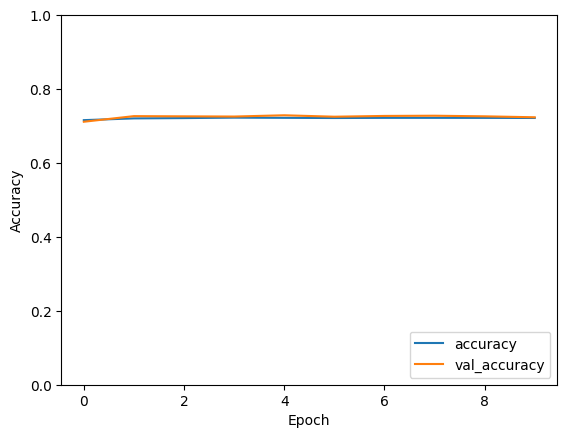

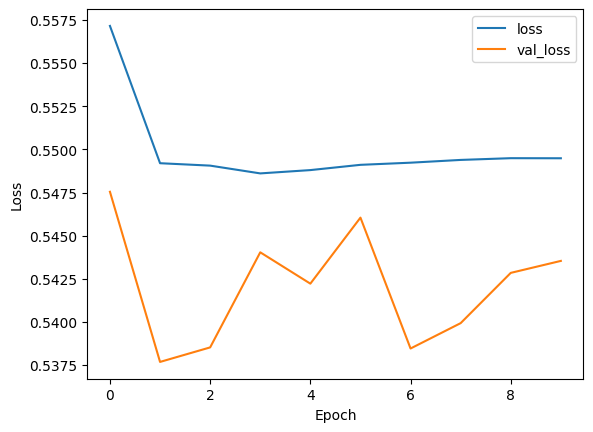

In [33]:
# Plot accuracy
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

6) Adição de complexidade até gerar overfitting (acrescentar layers, aumentar o número de neurónios, treinar por mais tempo);

In [34]:
#creates a set with all unique words of the df_final splitted
vocab = set()
for text in padded_df_final:
    vocab.update(text.split())

#len all unique words in the set created above
num_words = len(vocab)

embedding_dim=100 #set the dimensionality of the vectors

tf.random.set_seed(42) #to have reproducibility

#Creates a sequential model where the layers are fully connected to each other
model = tf.keras.Sequential([
    Embedding(input_dim=num_words, output_dim=embedding_dim, input_length=max_len), #transforms every word in a vector, in this case, of 100
    GlobalAveragePooling1D(), #calculates the average of the embedding vectors for  each data point
    tf.keras.layers.Dense(64, activation='relu', name = 'layer1'), # layer 1 with 64 nodes and the activation function is 'relu'
    tf.keras.layers.Dense(1,activation='sigmoid', name = 'layer2')]) #output layer with 1 node and activation function is 'sigmoid'


In [35]:
#compilation of the model to prepar it to train
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(from_logits=True), # loss function a aplicar
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=['accuracy'])

In [36]:
#prints model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 100)          200       
                                                                 
 global_average_pooling1d (  (None, 100)               0         
 GlobalAveragePooling1D)                                         
                                                                 
 layer1 (Dense)              (None, 64)                6464      
                                                                 
 layer2 (Dense)              (None, 1)                 65        
                                                                 
Total params: 6729 (26.29 KB)
Trainable params: 6729 (26.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [37]:
early_stopping = EarlyStopping(monitor='val_accuracy', patience=3)

In [ ]:
epochs=10
history=model.fit(train_dataset , epochs=epochs, validation_data=(val_dataset))

Epoch 1/10
40000/40000 [==============================] - 216s 5ms/step - loss: 0.6897 - accuracy: 0.5344 - val_loss: 0.6894 - val_accuracy: 0.5366
Epoch 2/10
38660/40000 [===========================>..] - ETA: 6s - loss: 0.6896 - accuracy: 0.5349

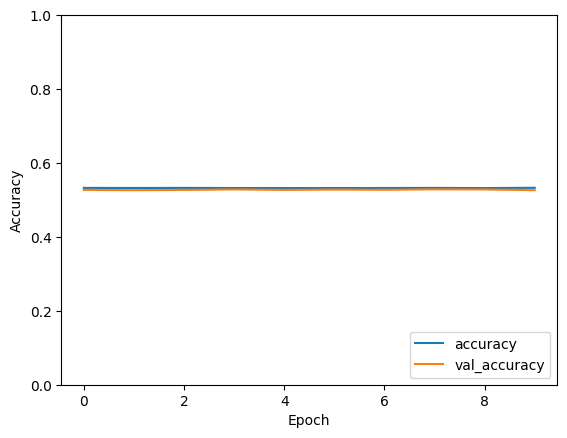

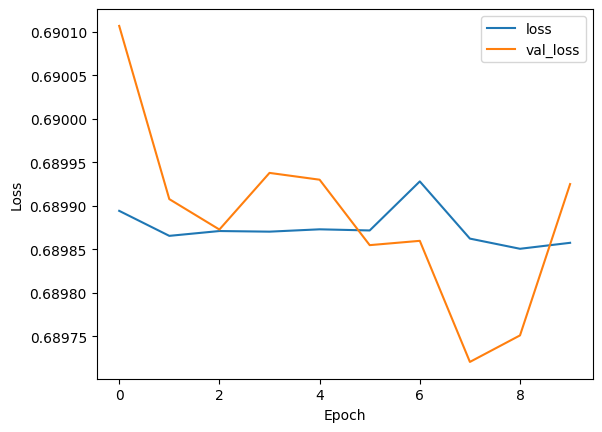

In [44]:
# Plot accuracy
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.ylabel('Epoch')
plt.xlabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.ylabel('Epoch')
plt.xlabel('Loss')
plt.legend(loc='upper right')
plt.show()

#### 6. Create model with regularization

In [ ]:
model_reg = Sequential([
    Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01), input_shape=(input_dim,)),
    Dropout(0.5),  # Dropout layer para regularização
    Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    Dropout(0.5),  # Dropout layer para regularização
    Dense(1, activation='sigmoid')])


In [ ]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])



In [ ]:
#implements a early stopping during the training if accuracy does not improve in 3 epochs
early_stopping = EarlyStopping(monitor='val_accuracy', patience=3)

In [ ]:
# Treinando o modelo
history = model_reg.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

In [ ]:
# Plot accuracy
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.ylabel('Epoch')
plt.xlabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.ylabel('Epoch')
plt.xlabel('Loss')
plt.legend(loc='upper right')
plt.show()

#Model Evaluation

In [43]:
#models evaluation
test_loss_baseline, test_acc_baseline = model_baseline.evaluate(X_test, y_test)
print('Test accuracy for model_baseline:', test_acc)

test_loss_model, test_acc_model= model.evaluate(X_test, y_test)
print('Test accuracy for model:', test_acc)

test_loss_model, test_acc_model= model.evaluate(X_test, y_test)
print('Test accuracy for model with regularization:', test_acc)

5000/5000 [==============================] - 14s 3ms/step - loss: 0.6898 - accuracy: 0.5274
Test accuracy: 0.527400016784668
